In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option("display.max_columns",None)


In [ ]:
df_2020 = pd.read_csv("/content/drive/MyDrive/P3_Data/Data/Bareilly2020.csv")
df_2021 = pd.read_csv("/content/drive/MyDrive/P3_Data/Data/Bareilly2021.csv")

In [ ]:
from IPython.core.display import display, HTML
display(HTML('<h2 style="color:Blue"> <b> Smart Meter Data Bareilly 2020 </b> </h2> '))

display(df_2020.shape)
display(df_2020.head())

from IPython.core.display import display, HTML
display(HTML('<h2 style="color:Blue"> <b> Smart Meter Data Bareilly 2021 </b> </h2> '))

display(df_2021.shape)
df_2021.head()

(6627360, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2020-01-01 00:00:00,0.002,251.26,0.15,49.97,BR02
1,2020-01-01 00:03:00,0.001,251.23,0.15,49.94,BR02
2,2020-01-01 00:06:00,0.001,251.55,0.14,49.94,BR02
3,2020-01-01 00:09:00,0.001,251.97,0.14,50.09,BR02
4,2020-01-01 00:12:00,0.002,252.03,0.14,50.08,BR02


(3948960, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2021-01-02 00:00:00,0.002,253.36,0.25,50.09,BR02
1,2021-01-02 00:03:00,0.002,253.87,0.25,50.11,BR02
2,2021-01-02 00:06:00,0.020,253.25,1.67,50.14,BR02
3,2021-01-02 00:09:00,0.045,252.20,3.52,50.12,BR02
4,2021-01-02 00:12:00,0.044,252.28,3.53,50.07,BR02


In [ ]:
from IPython.core.display import display, HTML
display(HTML('<h2 style="color:Red"> <b> Merging 2020 & 2021 Data  </b> </h2> '))

df = df_2020.merge(df_2021, how='outer')
display(df.shape)
display(df.head())
df.tail()

(10576320, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2020-01-01 00:00:00,0.002,251.26,0.15,49.97,BR02
1,2020-01-01 00:03:00,0.001,251.23,0.15,49.94,BR02
2,2020-01-01 00:06:00,0.001,251.55,0.14,49.94,BR02
3,2020-01-01 00:09:00,0.001,251.97,0.14,50.09,BR02
4,2020-01-01 00:12:00,0.002,252.03,0.14,50.08,BR02


,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
10576315,2021-03-03 23:45:00,0.001,256.15,0.08,50.04,BR52
10576316,2021-03-03 23:48:00,0.000,256.19,0.06,50.02,BR52
10576317,2021-03-03 23:51:00,0.001,256.49,0.05,50.04,BR52
10576318,2021-03-03 23:54:00,0.000,256.09,0.06,50.09,BR52
10576319,2021-03-03 23:57:00,0.001,256.36,0.05,50.05,BR52


In [ ]:
df.rename(columns={"x_Timestamp" : 'Timestamp', "t_kWh" : "Electricity_consumption(kWh)",
                  "z_Avg Voltage (Volt)" : "Avg_Voltage(Volt)", "z_Avg Current (Amp)" : "Avg_Current(Amp)",
                 "y_Freq (Hz)" : "Freq(Hz)" ,"meter" : "Smart_Meter" },inplace=True)

df.head()

,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter
0,2020-01-01 00:00:00,0.002,251.26,0.15,49.97,BR02
1,2020-01-01 00:03:00,0.001,251.23,0.15,49.94,BR02
2,2020-01-01 00:06:00,0.001,251.55,0.14,49.94,BR02
3,2020-01-01 00:09:00,0.001,251.97,0.14,50.09,BR02
4,2020-01-01 00:12:00,0.002,252.03,0.14,50.08,BR02


In [ ]:
def reduce_mem_usage(df):
    """iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:4] == "uint":
                if c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif (
                    c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max
                ):
                    df[col] = df[col].astype(np.uint16)
                elif (
                    c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max
                ):
                    df[col] = df[col].astype(np.uint32)
                elif (
                    c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max
                ):
                    df[col] = df[col].astype(np.uint64)
            else:
                # can't be smaller than that because of the parquet file format
                if (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))

    return df


df = reduce_mem_usage(df)

Memory usage of dataframe is 484.15 MB
Memory usage after optimization is: 222.31 MB
Decreased by 54.1%


In [ ]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Date"] = df["Timestamp"].dt.date
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Week"] = df["Timestamp"].dt.isocalendar().week
df["Day"] = df["Timestamp"].dt.day
df["Dayofyear"] = df["Timestamp"].dt.dayofyear
df["Dayofweek"] = df["Timestamp"].dt.dayofweek
df["Weekday"] = df["Timestamp"].dt.weekday
df["Hour"] = df["Timestamp"].dt.hour
df["Minute"] = df["Timestamp"].dt.minute
df["Quarter"] = df["Timestamp"].dt.quarter
df['TIME'] = df["Timestamp"].apply(lambda x:x.time())

df.head()


,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter,Date,Year,Month,Week,Day,Dayofyear,Dayofweek,Weekday,Hour,Minute,Quarter,TIME
0,2020-01-01 00:00:00,0.002,251.259995,0.15,49.970001,BR02,2020-01-01,2020,1,1,1,1,2,2,0,0,1,00:00:00
1,2020-01-01 00:03:00,0.001,251.229996,0.15,49.939999,BR02,2020-01-01,2020,1,1,1,1,2,2,0,3,1,00:03:00
2,2020-01-01 00:06:00,0.001,251.550003,0.14,49.939999,BR02,2020-01-01,2020,1,1,1,1,2,2,0,6,1,00:06:00
3,2020-01-01 00:09:00,0.001,251.970001,0.14,50.090000,BR02,2020-01-01,2020,1,1,1,1,2,2,0,9,1,00:09:00
4,2020-01-01 00:12:00,0.002,252.029999,0.14,50.080002,BR02,2020-01-01,2020,1,1,1,1,2,2,0,12,1,00:12:00


In [ ]:
df["Season"] = [ "Winter" if i < 3 or i > 11 else "Spring" if 3 <= i < 6 else "Summer" if 6 <= i < 9 else "Autumn" for i in df["Month"]]
df.head()

,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter,Date,Year,Month,Week,Day,Dayofyear,Dayofweek,Weekday,Hour,Minute,Quarter,TIME,Season
0,2020-01-01 00:00:00,0.002,251.259995,0.15,49.970001,BR02,2020-01-01,2020,1,1,1,1,2,2,0,0,1,00:00:00,Winter
1,2020-01-01 00:03:00,0.001,251.229996,0.15,49.939999,BR02,2020-01-01,2020,1,1,1,1,2,2,0,3,1,00:03:00,Winter
2,2020-01-01 00:06:00,0.001,251.550003,0.14,49.939999,BR02,2020-01-01,2020,1,1,1,1,2,2,0,6,1,00:06:00,Winter
3,2020-01-01 00:09:00,0.001,251.970001,0.14,50.090000,BR02,2020-01-01,2020,1,1,1,1,2,2,0,9,1,00:09:00,Winter
4,2020-01-01 00:12:00,0.002,252.029999,0.14,50.080002,BR02,2020-01-01,2020,1,1,1,1,2,2,0,12,1,00:12:00,Winter


In [ ]:
from IPython.core.display import display, HTML
display(HTML('<h1 style="color:Red"> <b> Average Electricity Consumption(kWh) with Season and Hour wise:</b> </h1> '))

table = pd.pivot_table(df, values = "Electricity_consumption(kWh)", columns = "Season", index = "Hour", aggfunc = np.mean )
table

Season,Autumn,Spring,Summer,Winter
Hour,,,,
0,0.021971,0.016983,0.032602,0.008735
1,0.020817,0.016061,0.030897,0.007755
2,0.019575,0.015118,0.029397,0.007178
3,0.018381,0.014395,0.027628,0.006933
4,0.017269,0.013861,0.024991,0.006924
5,0.015858,0.012994,0.022057,0.007469
6,0.012223,0.010203,0.019517,0.008927
7,0.012938,0.011665,0.019043,0.011510
8,0.017517,0.016218,0.019008,0.015846


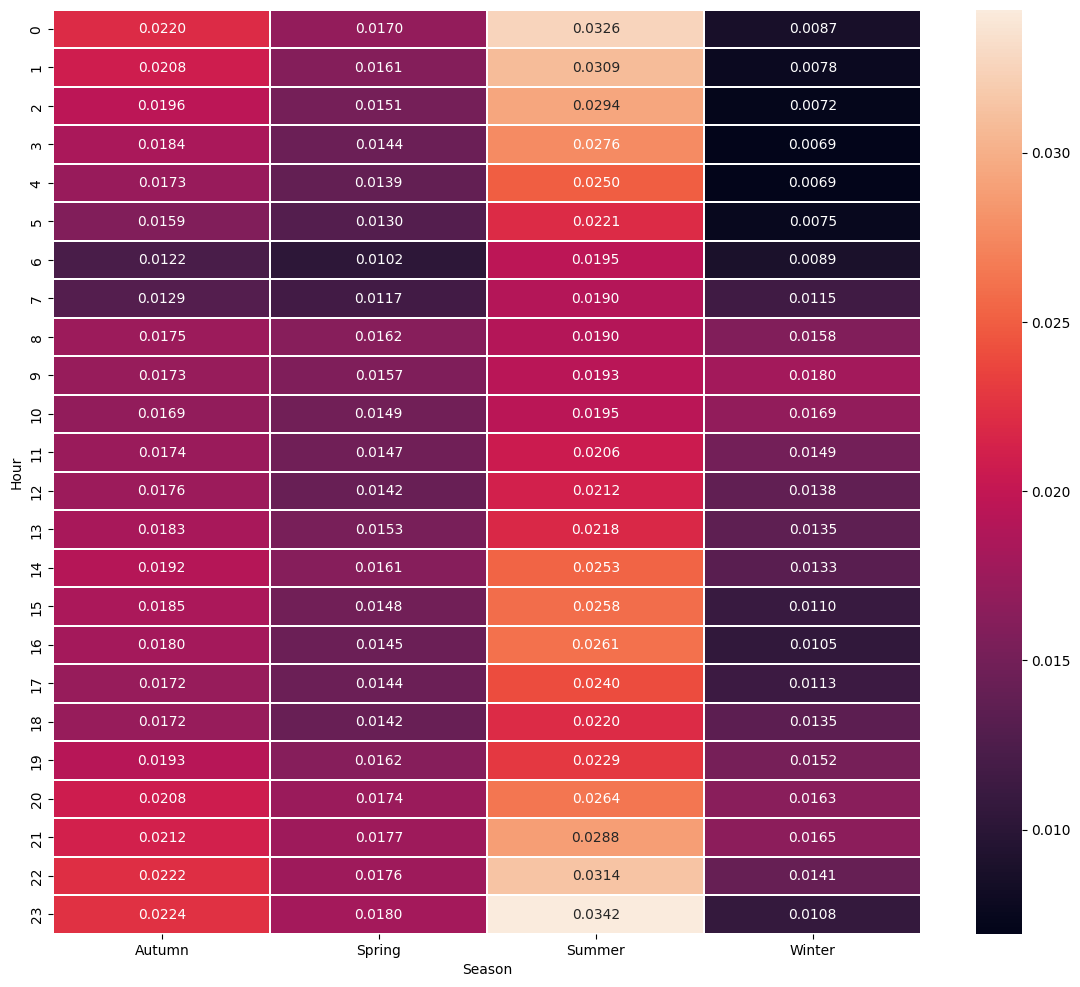

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(table, annot = True, fmt = ".4f", linewidth = 0.2 );

In [ ]:
# Extracting Night and Day time according to season
df.loc[((df["Hour"] > 7) & (df['Hour'] < 18)) & (df['Season']=='Winter'), 'Time'] = 'Day'
df.loc[((df["Hour"] > 5) & (df['Hour'] < 19)) & (df['Season']=='Spring'), 'Time'] = 'Day'
df.loc[((df["Hour"] > 5) & (df['Hour'] < 20)) & (df['Season']=='Summer'), 'Time'] = 'Day'
df.loc[((df["Hour"] > 6) & (df['Hour'] < 18)) & (df['Season']=='Autumn'), 'Time'] = 'Day'
df.loc[((df["Hour"] <= 7) | (df['Hour'] >= 18)) & (df['Season']=='Winter'), 'Time'] = 'Night'
df.loc[((df["Hour"] <= 5) | (df['Hour'] >= 19)) & (df['Season']=='Spring'), 'Time'] = 'Night'
df.loc[((df["Hour"] <= 5) | (df['Hour'] >= 20)) & (df['Season']=='Summer'), 'Time'] = 'Night'
df.loc[((df["Hour"] <= 6) | (df['Hour'] >= 18)) & (df['Season']=='Autumn'), 'Time'] = 'Night'
df.head()

,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter,Date,Year,Month,Week,Day,Dayofyear,Dayofweek,Weekday,Hour,Minute,Quarter,TIME,Season,Time
0,2020-01-01 00:00:00,0.002,251.259995,0.15,49.970001,BR02,2020-01-01,2020,1,1,1,1,2,2,0,0,1,00:00:00,Winter,Night
1,2020-01-01 00:03:00,0.001,251.229996,0.15,49.939999,BR02,2020-01-01,2020,1,1,1,1,2,2,0,3,1,00:03:00,Winter,Night
2,2020-01-01 00:06:00,0.001,251.550003,0.14,49.939999,BR02,2020-01-01,2020,1,1,1,1,2,2,0,6,1,00:06:00,Winter,Night
3,2020-01-01 00:09:00,0.001,251.970001,0.14,50.090000,BR02,2020-01-01,2020,1,1,1,1,2,2,0,9,1,00:09:00,Winter,Night
4,2020-01-01 00:12:00,0.002,252.029999,0.14,50.080002,BR02,2020-01-01,2020,1,1,1,1,2,2,0,12,1,00:12:00,Winter,Night


In [ ]:
def categorize_hour(Hour):
    if 0 <= Hour <= 6:
        return 'Midnight'
    elif 7 <= Hour <= 12:
        return 'Morning'
    elif 13 <= Hour <= 18:
        return 'Afternoon'
    elif 19 <= Hour <= 23:
        return 'Night'
    else:
        return 'Unknown'

# Apply the categorization function to the 'Hour' column and create a new column 'Time_Category'
df['Time_Category'] = df['Hour'].apply(categorize_hour)
df.head()

,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter,Date,Year,Month,Week,Day,Dayofyear,Dayofweek,Weekday,Hour,Minute,Quarter,TIME,Season,Time,Time_Category
0,2020-01-01 00:00:00,0.002,251.259995,0.15,49.970001,BR02,2020-01-01,2020,1,1,1,1,2,2,0,0,1,00:00:00,Winter,Night,Midnight
1,2020-01-01 00:03:00,0.001,251.229996,0.15,49.939999,BR02,2020-01-01,2020,1,1,1,1,2,2,0,3,1,00:03:00,Winter,Night,Midnight
2,2020-01-01 00:06:00,0.001,251.550003,0.14,49.939999,BR02,2020-01-01,2020,1,1,1,1,2,2,0,6,1,00:06:00,Winter,Night,Midnight
3,2020-01-01 00:09:00,0.001,251.970001,0.14,50.090000,BR02,2020-01-01,2020,1,1,1,1,2,2,0,9,1,00:09:00,Winter,Night,Midnight
4,2020-01-01 00:12:00,0.002,252.029999,0.14,50.080002,BR02,2020-01-01,2020,1,1,1,1,2,2,0,12,1,00:12:00,Winter,Night,Midnight


In [ ]:
df_humi = df.groupby(["Electricity_consumption(kWh)", "Year", "Season" ,"Time_Category"], as_index = False)["Electricity_consumption(kWh)"].mean().sort_values(by="Season", ascending = False)
df_humi

,Year,Season,Time_Category,Electricity_consumption(kWh)
5664,2021,Winter,Morning,0.177
1276,2021,Winter,Afternoon,0.039
5043,2021,Winter,Midnight,0.157
5042,2021,Winter,Afternoon,0.157
2175,2021,Winter,Night,0.067
...,...,...,...,...
6002,2021,Autumn,Morning,0.189
6001,2021,Autumn,Midnight,0.189
6000,2021,Autumn,Afternoon,0.189
3650,2020,Autumn,Morning,0.114


In [ ]:
table2 = pd.pivot_table(df_humi, values =["Electricity_consumption(kWh)"], index = ["Season","Year","Time_Category"])
table2


Electricity_consumption(kWh)
Season Year Time_Category                              
Autumn 2020 Afternoon                          0.124310
            Midnight                           0.102059
            Morning                            0.102932
            Night                              0.123591
       2021 Afternoon                          0.121417
            Midnight                           0.117596
            Morning                            0.127048
            Night                              0.129421
Spring 2020 Afternoon                          0.118890
            Midnight                           0.101627
            Morning                            0.122784
            Night                              0.114822
       2021 Afternoon                          0.124601
            Midnight                           0.091115
            Morning                            0.123208
            Night                              0.111601
Summer 2020 Afternoon                          0.126668
            Midnight                           0.111973
            Morning                            0.109539
            Night                              0.131176
       2021 Afternoon                          0.131256
            Midnight                           0.113794
            Morning                            0.114058
            Night                              0.130176
Winter 2020 Afternoon                          0.125169
            Midnight                           0.094686
            Morning                            0.113544
            Night                              0.109772
       2021 Afternoon                          0.129687
            Midnight                           0.096144
            Morning                            0.120705
            Night                              0.112638

In [ ]:
df[['Electricity_consumption(kWh)', 'Avg_Voltage(Volt)',
       'Avg_Current(Amp)', 'Freq(Hz)']].agg(['sum','max','mean','std','skew','kurt'])

,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz)
sum,187493.984375,2.367011e+09,1.753454e+07,4.881374e+08
max,0.300000,6.546700e+02,5.704000e+01,2.083300e+02
mean,0.017728,2.238029e+02,1.657906e+00,4.615380e+01
std,0.025510,6.660178e+01,2.232596e+00,1.332697e+01
skew,2.952818,-2.859180e+00,2.841134e+00,-3.173381e+00
kurt,10.778303,6.877977e+00,1.075937e+01,8.079953e+00


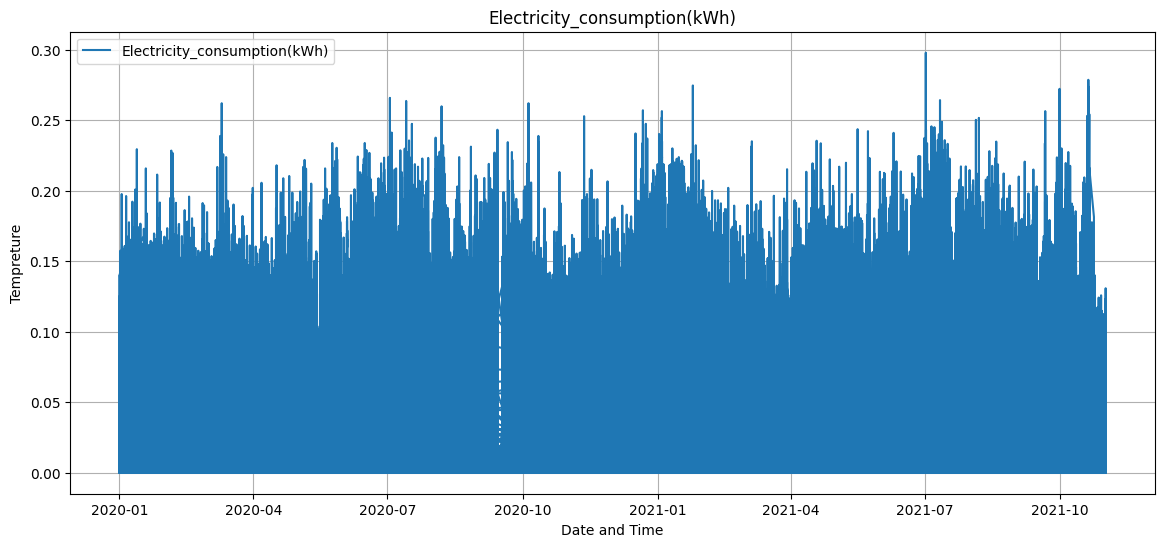

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(14, 6))

ax.plot(df.Timestamp,
        df['Electricity_consumption(kWh)'].rolling(window=5).mean(),
        label='Electricity_consumption(kWh)'
       )

ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Electricity_consumption(kWh)')
plt.xlabel('Date and Time')
plt.ylabel('Tempreture')
plt.show()

In [ ]:
plt.figure(figsize=(17,6))
sns.histplot(df['Electricity_consumption(kWh)'], bins=50, color='blue', kde=True)
plt.title('Electricity_consumption(kWh) Plot')
plt.xlabel('Electricity_consumption(kWh)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['Smart_Meter'], y=df['Electricity_consumption(kWh)'], palette="tab10")
plt.xticks(rotation=90)
plt.title('Electricity_consumption(kWh) plot')
plt.xlabel('Smart_Meter')
plt.ylabel('Electricity_consumption(kWh)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
hourly_yield = df.groupby(df['Hour'])[['Electricity_consumption(kWh)']].mean()
hourly_yield.plot(kind='bar', color='blue')
plt.title('Hourly Daily Electricity_consumption(kWh) Density')
plt.xlabel('Hour')
plt.ylabel('Average Electricity_consumption(kWh)')
plt.grid(True, axis='y')
plt.tight_layout()

In [ ]:
grouped_Electricity_consumption= df.groupby('Smart_Meter')['Electricity_consumption(kWh)'].mean()
grouped_Electricity_consumption.to_frame()

In [ ]:
grouped_Electricity_consumption= df.groupby('Smart_Meter')['Electricity_consumption(kWh)'].mean()

plt.figure(figsize=(14,14))
grouped_Electricity_consumption.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Electricity_consumption(kWh) Among Sources')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
grouped_Electricity_consumption= df.groupby('Smart_Meter')['Electricity_consumption(kWh)'].sum()

plt.figure(figsize=(14,14))
grouped_Electricity_consumption.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Electricity_consumption(kWh) Among Sources')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('output.csv', index=False)

In [ ]:
df

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

